# Credit Card Fraud Detection
#### Anonymized credit card transactions labeled as fraudulent or genuine

This is an attempt to try some models on this data set
Data source : Kaggle datasets: https://www.kaggle.com/dalpozz/creditcardfraud

Importing pandas and numpy libraries

In [1]:
import pandas as pd
import numpy as np
import time

Importing the data 

In [2]:
data = pd.read_csv("creditcard.csv.zip", compression='zip')

Sneak Peak at the Data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




The Machine Learning libraries that we're going to use are from sklearn packages, which takes input as numpy array,
So we need to convert the dataframe to numpy array

In [4]:
n_data = data.as_matrix()

Sneak peak at the first record after conversion

In [5]:
n_data[0]

array([  0.00000000e+00,  -1.35980713e+00,  -7.27811733e-02,
         2.53634674e+00,   1.37815522e+00,  -3.38320770e-01,
         4.62387778e-01,   2.39598554e-01,   9.86979013e-02,
         3.63786970e-01,   9.07941720e-02,  -5.51599533e-01,
        -6.17800856e-01,  -9.91389847e-01,  -3.11169354e-01,
         1.46817697e+00,  -4.70400525e-01,   2.07971242e-01,
         2.57905802e-02,   4.03992960e-01,   2.51412098e-01,
        -1.83067779e-02,   2.77837576e-01,  -1.10473910e-01,
         6.69280749e-02,   1.28539358e-01,  -1.89114844e-01,
         1.33558377e-01,  -2.10530535e-02,   1.49620000e+02,
         0.00000000e+00])

Splitting the data into feature variables and target variables

Feature Variables: X

In [6]:
X = n_data[:,:30]

Target Variable: Y

In [7]:
Y = n_data[:,30:31]

## Models

#### We are going to try different Machine Learning models and compare their accuracy on this dataset

##### Random Forest Model

Importing the library

In [8]:
from sklearn.ensemble import RandomForestClassifier

Defining the model

In [9]:
model  = RandomForestClassifier(n_estimators=100)

Training the model

In [11]:
start = time.time()
model.fit(X,Y)
end = time.time()
print "Training time : ",end - start

 Training time :  289.522795916


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Model Score: R_squared 

In [12]:
model.score(X,Y)

0.99999648885034431

Performing some predictions

In [13]:
model.predict(X[0])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])

In [14]:
Y[0]

array([ 0.])

In [15]:
model.predict(X[8335])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [16]:
Y[8335]

array([ 1.])

##### Feature Importance score 

In [17]:
feature_importance = model.feature_importances_

In [18]:
feature_importance

array([ 0.01231569,  0.01459686,  0.01138765,  0.01567375,  0.03104029,
        0.01211283,  0.01387115,  0.03007844,  0.01086688,  0.03839524,
        0.07310013,  0.05621701,  0.11745563,  0.01081344,  0.11587913,
        0.01101719,  0.07538416,  0.17525308,  0.0417208 ,  0.01254821,
        0.01373853,  0.01553973,  0.011292  ,  0.00680366,  0.00885468,
        0.00949458,  0.01991261,  0.01256673,  0.01088689,  0.01118303])

##### Feature Ranking and Importance Plot

Feature ranking:
1. feature 17 (0.175253)
2. feature 12 (0.117456)
3. feature 14 (0.115879)
4. feature 16 (0.075384)
5. feature 10 (0.073100)
6. feature 11 (0.056217)
7. feature 18 (0.041721)
8. feature 9 (0.038395)
9. feature 4 (0.031040)
10. feature 7 (0.030078)
11. feature 26 (0.019913)
12. feature 3 (0.015674)
13. feature 21 (0.015540)
14. feature 1 (0.014597)
15. feature 6 (0.013871)
16. feature 20 (0.013739)
17. feature 27 (0.012567)
18. feature 19 (0.012548)
19. feature 0 (0.012316)
20. feature 5 (0.012113)
21. feature 2 (0.011388)
22. feature 22 (0.011292)
23. feature 29 (0.011183)
24. feature 15 (0.011017)
25. feature 28 (0.010887)
26. feature 8 (0.010867)
27. feature 13 (0.010813)
28. feature 25 (0.009495)
29. feature 24 (0.008855)
30. feature 23 (0.006804)


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


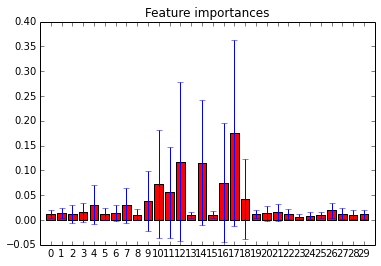

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(feature_importance)[::-1]
ar = np.array(range(len(feature_importance)))
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importance[ar],
       color="r", yerr=std[ar], align="center")
plt.xticks(range(X.shape[1]), ar)
plt.xlim([-1, X.shape[1]])
plt.show()

### Logistic Regression Model

Importing the library

In [20]:
from sklearn.linear_model import LogisticRegression

Defining the model

In [21]:
model2 = LogisticRegression()

Training the model

In [22]:
start  = time.time()
model2.fit(X,Y)
end = time.time()
print "Training time :", end- start

Training time : 3.90506792068


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score: Mean accuracy

In [23]:
model2.score(X,Y)

0.99902390039570654

## Support Vector Machine Model

Importing the library

In [24]:
from sklearn.svm import SVC

Defining the model

In [25]:
model3 = SVC()

Training the model

In [26]:
start = time.time()
model3.fit(X,Y)
end = time.time()
print "Training time:", end-start

Training time: 11237.9444401


Model Score: mean accuracy

In [27]:
model3.score(X,Y)

0.99982795366686916

### Neural Network

Importing the library

In [29]:
from sklearn.neural_network import MLPClassifier

In [36]:
model4 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(3), random_state=1)

In [37]:
model4.fit(X,Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [38]:
model4.score(X,Y)

0.99827251436937992

## From the scores (mean accuracies) we see that all the models we tried so far are performing well but that's not really the case

### Next I'm going to perform some experiments to make this issue clean

## checking the data balance

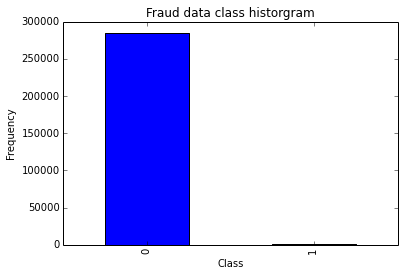

In [42]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()

count_classes.plot(kind = 'bar')
plt.title("Fraud data class historgram")
plt.xlabel("Class")
plt.ylabel("Frequency")

## The data is highly unbalanced

### The confusion matrix will give a more honest assessment of the performance

In [127]:
from sklearn.metrics import confusion_matrix

### Confusion matices for the different models

In [128]:
confusion_matrix(Y,model.predict(X))

array([[284315,      0],
       [     1,    491]])

In [129]:
confusion_matrix(Y,model2.predict(X))

array([[284240,     75],
       [   203,    289]])

In [ ]:
confusion_matrix(Y,model3.predict(X))

In [130]:
confusion_matrix(Y,model4.predict(X))

array([[284315,      0],
       [   492,      0]])

### As shown through the confusion matrices, the precision and recall are not as impressive as the mean accuracy scores
#### The reason why the mean accuracy error was misleading is the fact that the data is highly unbalaced

In [131]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

#### so when calculating the average accuracy, it depends on the model of course, but most of the observation are going to be classified as Class 0, which makes the high majority of the observations correctly classified, so when the mean is going to be a good result since it's dominated by the dominating class. 

In [45]:
X_1 = class_1.as_matrix()[:,:30]

Y_1 = class_1.as_matrix()[:,30:31]

#### Now I'm going to balance the dataset 
##### balancing the dataset in this case means having the same pecentage of each class in the dataset
##### I'm going to reduce the number of observation for the dominating class

In [64]:
class_0 = data[data['Class'] == 0].head(492)

In [65]:
balances_data = pd.concat([class_0,class_1])

##### Shuffeling the data set 

In [66]:
balances_data_s = balances_data.iloc[np.random.permutation(len(balances_data))]

#### Evaluation of each model on the balanced data set

In [68]:
model_alt = RandomForestClassifier(n_estimators=100)

In [70]:
X_b = balances_data_s.as_matrix()[:,:30]

In [72]:
Y_b = balances_data_s.as_matrix()[:,30:31]

In [73]:
model_alt.fit(X_b,Y_b)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [77]:
model_alt.score(X,Y)

0.017629482421429248

##### This model did not perform on the balanced dataset as well as it did on the unbalanced data set

In [91]:
fitted = model_alt.predict(X)

#### Precision and Recall values

In [94]:
from sklearn.metrics import precision_recall_curve
precision, recall, th = precision_recall_curve(Y,fitted)

In [95]:
precision

array([ 0.0017554,  1.       ])

In [96]:
recall

array([ 1.,  0.])

In [97]:
th

array([ 1.])

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,fitted)

array([[  4529, 279786],
       [     0,    492]])

In [100]:
fiited_un = model.predict(X)

In [101]:
confusion_matrix(Y,fiited_un)

array([[284315,      0],
       [     1,    491]])

##### The performance of RandomForest Model on unbalanced dataset is better than it's performance on smaller but balanced dataset
###### For the case of RandomForest, this should come as no surprise as one the advanteges of this model is the fact the it can handle unbalanced datasets.

In [102]:
fitted = model2.predict(X)

In [103]:
confusion_matrix(Y,fitted)

array([[284240,     75],
       [   203,    289]])

##### In the case of the regression model, we can through the confusion matrix that this model is not performing as well as indicated by the mean accuracy score, espacially in classifying the Class 1 observations.

##### Let's train the same model on the balanced dataset

In [104]:
model2_ba = LogisticRegression()

In [105]:
model2_ba.fit(X_b,Y_b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
model2_ba.score(X_b,Y_b)

0.86077235772357719

##### Compared to training on the unbalanced dataset, training the regression model on smaller but balanced dataset seems to result in a slight drop in the mean accuracy score for training, let's take a look at the mean accuracy over unseen data.

In [107]:
model2_ba.score(X,Y)

0.0074260815218727067

##### This model is clearly performing poorly, let's take a look at the confusion matrix to confirm

In [108]:
fitted = model2_ba.predict(X)

In [109]:
confusion_matrix(Y,fitted)

array([[  1627, 282688],
       [     4,    488]])

##### Let's see how MLP will do

In [110]:
model4_ba = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5,3,2), random_state=1)

In [111]:
model4_ba.fit(X_b,Y_b)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [112]:
model4_ba.score(X_b,Y_b)

0.5

In [113]:
model4_ba.score(X,Y)

0.001727485630620034

In [116]:
confusion_matrix(Y,model4_ba.predict(X))

array([[     0, 284315],
       [     0,    492]])